In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
fName = '/Users/yuntse/data/arduino/TCSensor/TCSensor_ricecooker_20220923.cvs'

In [3]:
Temp = pd.read_csv(fName, header = None, skiprows = 1, names = ['Time', 'TC_Temp', 'CJT_Temp'])

In [4]:
Temp['Time'] = Temp['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))

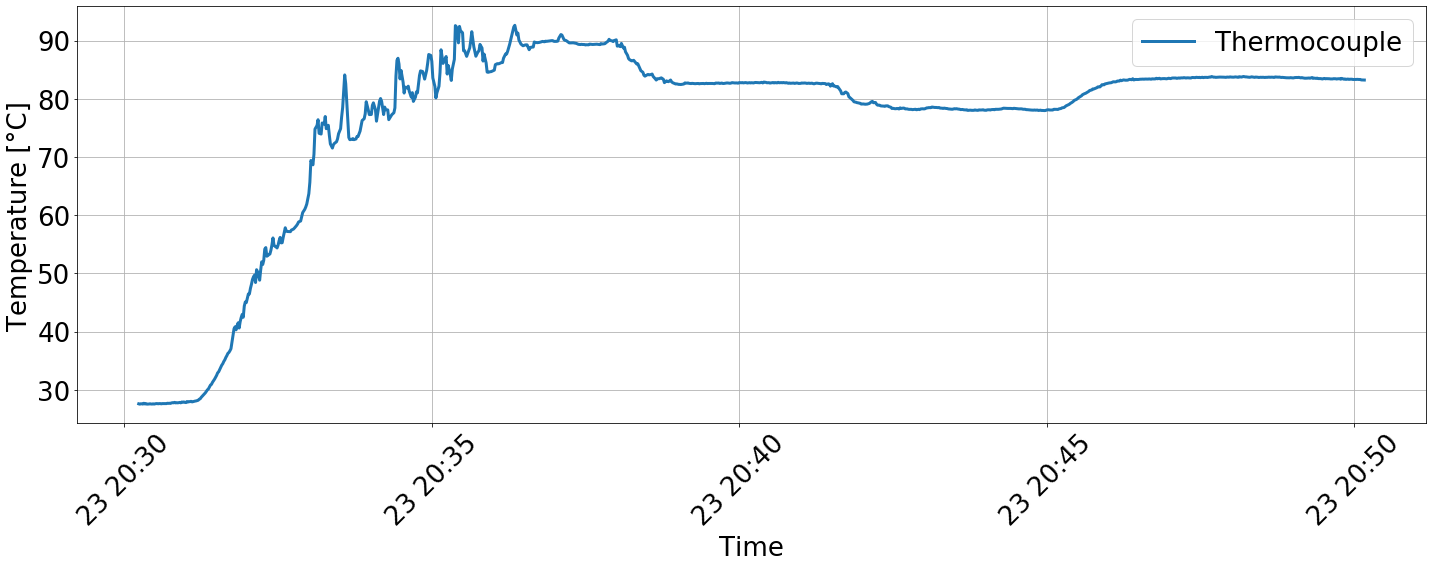

In [7]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20,8))

# make a plot
ax.plot( Temp['Time'], Temp['TC_Temp'], label = 'Thermocouple', lw = 3)
# set x-axis label
ax.set_xlabel('Time', fontsize = 26)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax.set_ylabel('Temperature ['+u'\u00b0'+'C]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)

# set plot title
# ax.set_title( label = '2022/05/15 Field Shell Current Variation', fontsize = 26)

ax.grid('.')
ax.legend(loc = 'best', ncol = 1, fontsize = 26)

plt.tight_layout()
plt.show()

# save the plot as a file
fig.savefig('/Users/yuntse/Documents/ArduinoProject/TCSensor/TCSensor_ricecooker_20220923.png')

In [8]:
Temp['Duration'] = Temp['Time'] - min( Temp['Time'] )

In [9]:
fRefName = '/Users/yuntse/data/arduino/TCSensor/TCSensor_ricecooker_20220905.cvs'

In [10]:
RefTemp = pd.read_csv(fRefName, header = None, skiprows = 1, names = ['Time', 'TC_Temp', 'CJT_Temp'])

In [11]:
RefTemp['Time'] = RefTemp['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))
RefTemp['Duration'] = RefTemp['Time'] - min( RefTemp['Time'] )

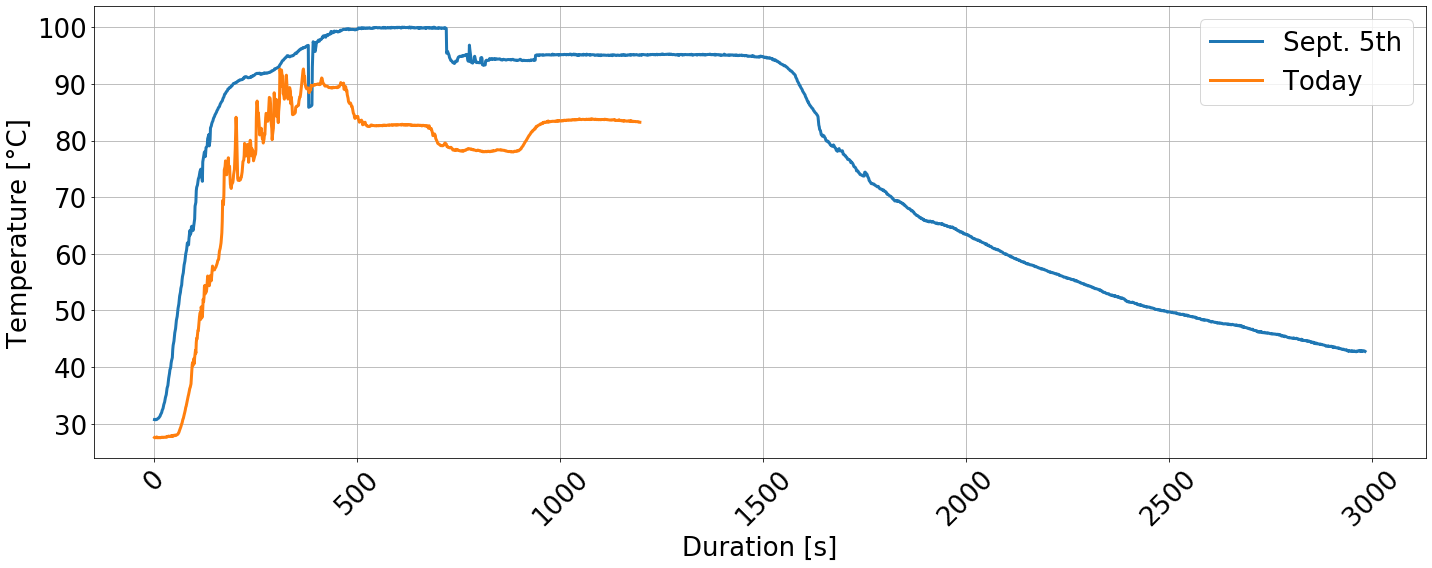

In [13]:
# create figure and axis objects with subplots()
fig1, ax1 = plt.subplots(figsize = (20,8))

# make a plot
ax1.plot( RefTemp['Duration']/1e9, RefTemp['TC_Temp'], label = 'Sept. 5th', lw = 3)
ax1.plot( Temp['Duration']/1e9, Temp['TC_Temp'], label = 'Today', lw = 3)
# set x-axis label
ax1.set_xlabel('Duration [s]', fontsize = 26)
ax1.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax1.set_ylabel('Temperature ['+u'\u00b0'+'C]', fontsize = 26)
ax1.tick_params(axis = 'y', labelsize = 26)

# set plot title
# ax.set_title( label = '2022/05/15 Field Shell Current Variation', fontsize = 26)

ax1.grid('.')
ax1.legend(loc = 'best', ncol = 1, fontsize = 26)

plt.tight_layout()
plt.show()

# save the plot as a file
fig1.savefig('/Users/yuntse/Documents/ArduinoProject/TCSensor/TCSensor_ricecooker_20220923_compare.png')